# KMeans CLUSTERING with PYTHON

The most common and simplest clustering algorithm out there is the K-Means clustering. This algorithms involve you telling the algorithms how many possible cluster (or K) there are in the dataset. The algorithm then iteratively moves the k-centers and selects the datapoints that are closest to that centroid in the cluster.

In this, We need to predict the optimum number of clusters from IRIS data set and visualize it. 
Let’s start to code our model step by step. You can see sufficient information in the comment lines of the code.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# Import the data set
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows
print(iris.target_names)


['setosa' 'versicolor' 'virginica']


In [26]:
x  = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 
                                     'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])


Now we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called x so that we can train our model with these features. For this, we use the iloc function on df, and the column index (0,1,2,3) for the above four columns are used, as shown below:

In [20]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [30]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


To start, let’s arbitrarily assign the value of k as 3. We will implement k-means clustering using k=3. For this we will instantiate the KMeans class and assign it to the variable kmeans3:

[681.3706, 152.34795176035792, 78.85144142614601, 57.25600931571815, 46.44618205128205, 39.03998724608725, 34.40900974025974, 30.137843073593082, 27.78874464570518]


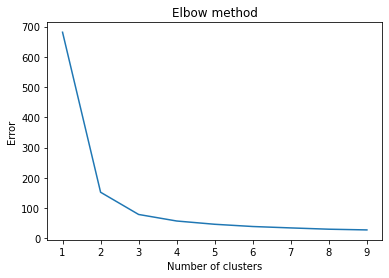

In [31]:
from sklearn.cluster import KMeans

Error =[]
K = range(1,10)
for i in K:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
print(Error)
plt.plot(K, Error)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. 
So let’s use this method to calculate the optimum value of k.

In [23]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit(x)
predict = y_kmeans3.predict(x)
print(y_kmeans3)
labels = kmeans3.labels_
kmeans3.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Text(0.5, 0.92, 'K Means')

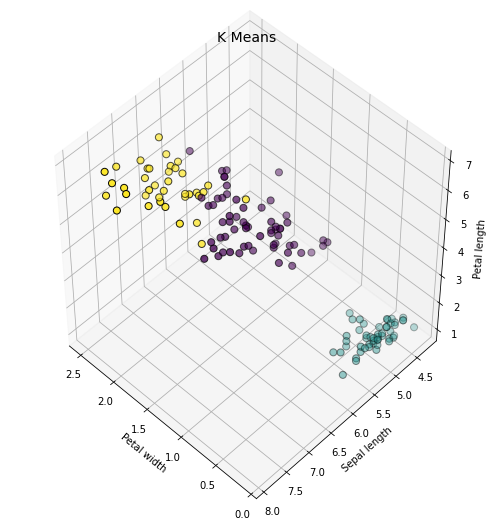

In [24]:
from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)  #plot first three features in a 3d Plot.  
#Using : means that we take all elements in the correspond array dimension
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

Text(0.5, 0.92, 'K Means')

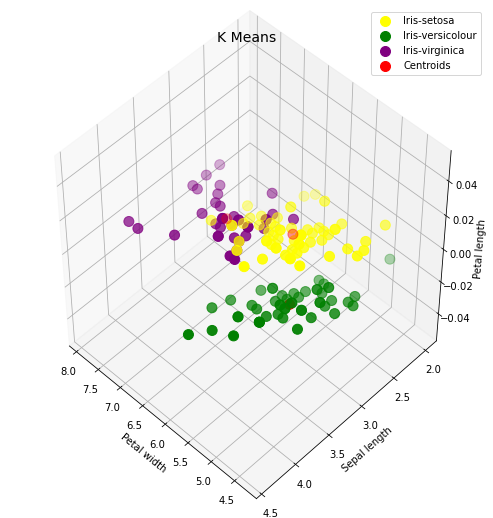

In [25]:

from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[predict == 0, 0], x[predict == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
ax.scatter(x[predict == 1, 0], x[predict == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
ax.scatter(x[predict == 2, 0], x[predict == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')

# Plotting the centroids of the clusters
ax.scatter(y_kmeans3.cluster_centers_[:, 0], y_kmeans3.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
    
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.legend(loc ='upper right')
plt.title("K Means", fontsize=14)

In [32]:
predictedY = np.choose(kmeans3.labels_, [0, 1, 2]).astype(np.int64)

In [33]:
print(predictedY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [34]:
import sklearn.metrics as sm
sm.accuracy_score(predictedY, y['Target'])

0.24

In [35]:
sm.confusion_matrix(predictedY, y['Target'])

array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]], dtype=int64)

In [14]:
x.shape

(150, 4)

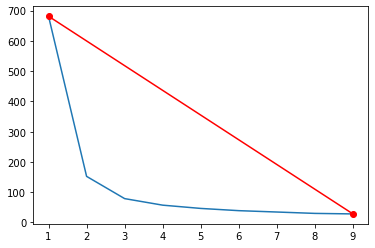

In [15]:
plt.plot(K, Error)
plt.plot([K[0], K[8]], [Error[0], 
                        Error[8]], 'ro-')
plt.show()